# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [47]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [48]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.




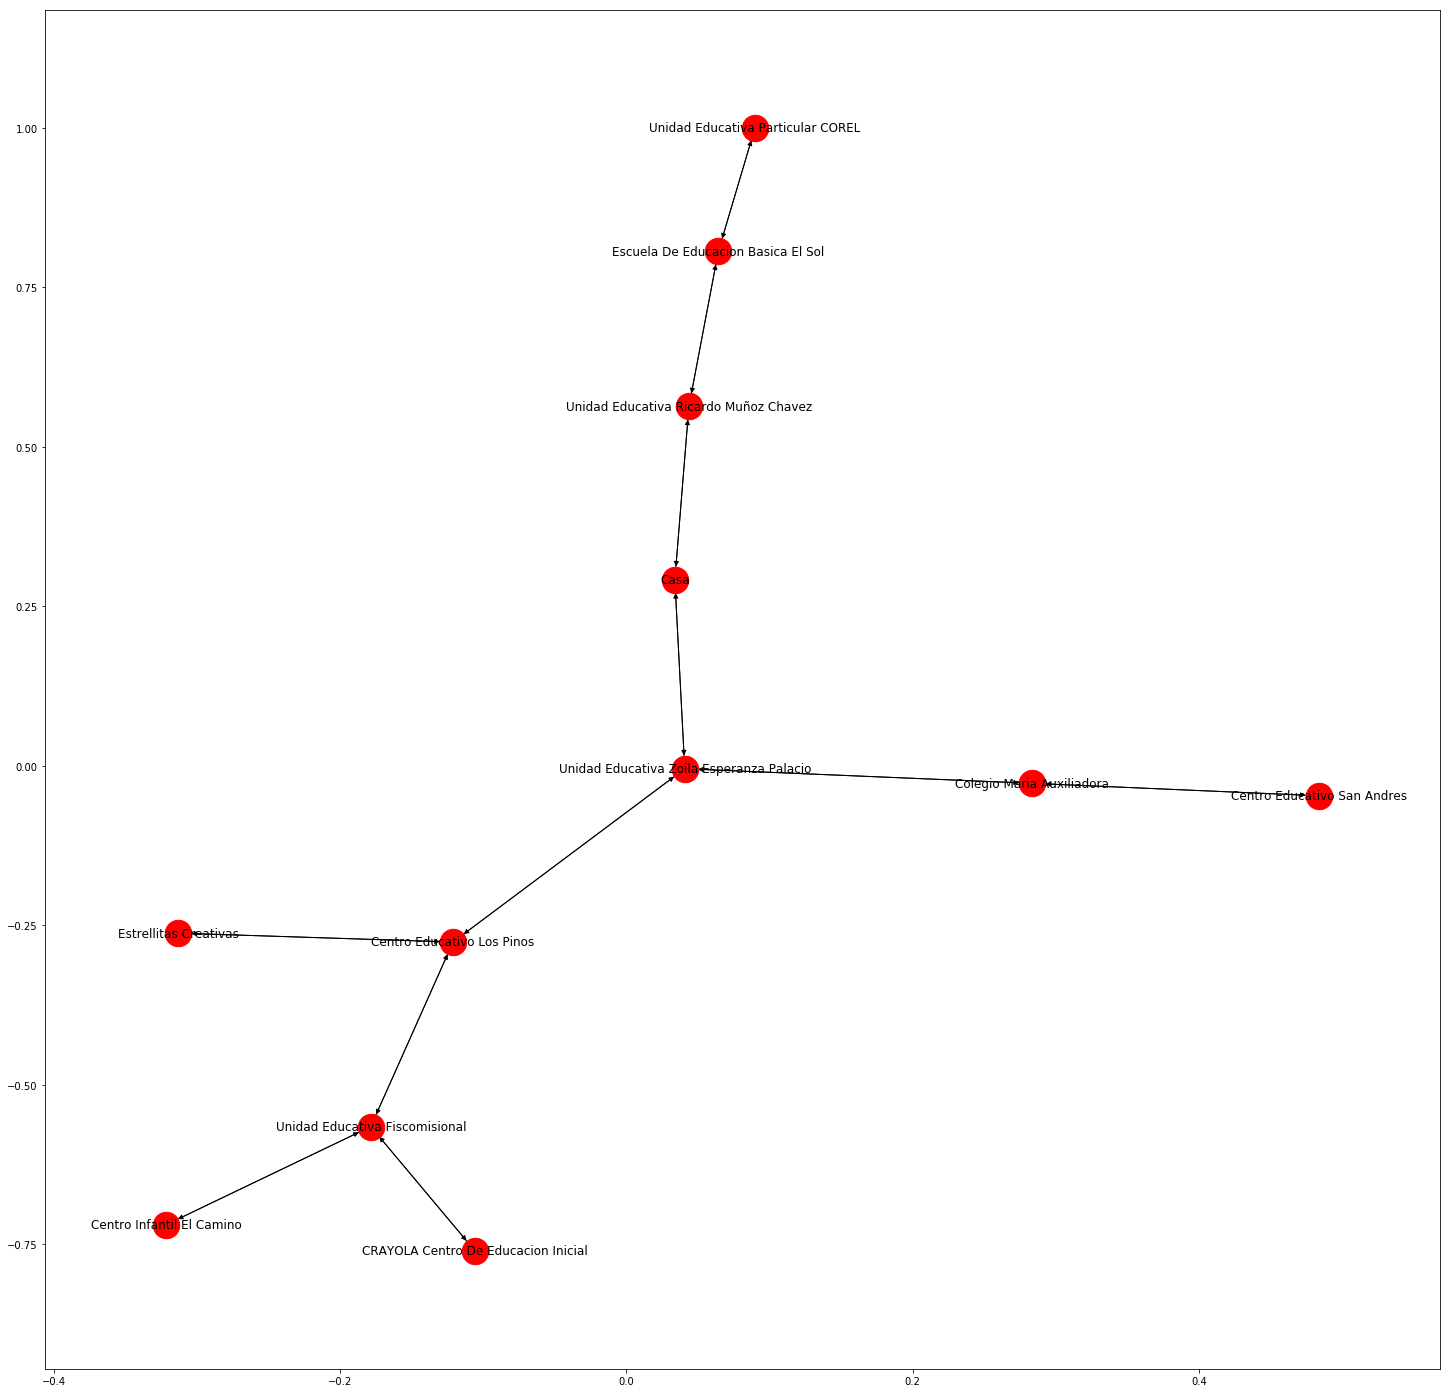

['Casa', 'Unidad Educativa Zoila Esperanza Palacio', 'Centro Educativo Los Pinos', 'Estrellitas Creativas']


In [76]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

def search_profundidad(gra, init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]        
        for node in gra[node_data]:
            child = Node(node)
            child_list.append(child)
        init_node.set_child(child_list)
        
        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(gra, node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None
    
centrosEducativos = {
    'Casa' : ['Unidad Educativa Zoila Esperanza Palacio', 'Unidad Educativa Ricardo Muñoz Chavez'],
    'Unidad Educativa Zoila Esperanza Palacio': ['Casa', 'Colegio Maria Auxiliadora', 'Centro Educativo Los Pinos'],
    'Colegio Maria Auxiliadora': ['Unidad Educativa Zoila Esperanza Palacio', 'Centro Educativo San Andres'],
    'Centro Educativo San Andres': ['Colegio Maria Auxiliadora'],
    'Centro Educativo Los Pinos': ['Unidad Educativa Zoila Esperanza Palacio', 'Unidad Educativa Fiscomisional', 'Estrellitas Creativas'],
    'Unidad Educativa Fiscomisional': ['Centro Educativo Los Pinos', 'CRAYOLA Centro De Educacion Inicial', 'Centro Infantil El Camino'],
    'CRAYOLA Centro De Educacion Inicial': ['Unidad Educativa Fiscomisional'],
    'Centro Infantil El Camino': ['Unidad Educativa Fiscomisional'],
    'Estrellitas Creativas': ['Centro Educativo Los Pinos'],
    'Unidad Educativa Ricardo Muñoz Chavez': ['Casa', 'Escuela De Educacion Basica El Sol'],
    'Escuela De Educacion Basica El Sol': ['Unidad Educativa Ricardo Muñoz Chavez', 'Unidad Educativa Particular COREL'],
    'Unidad Educativa Particular COREL': ['Escuela De Educacion Basica El Sol']
}

def graficarNodos(conectores):
    grafic = nx.DiGraph()
    grafic.add_nodes_from(conectores)
    for key, lista in conectores.items():
        for i in lista:
            grafic.add_edge(key,i)
                
    plt.figure(figsize=(25,25))  
    pos=nx.spring_layout(grafic)
    edge_labels = nx.get_edge_attributes(grafic,'km')   
    nx.draw_networkx_edge_labels(grafic, pos, edge_labels = edge_labels) 
    nx.draw_networkx(grafic, pos, node_size=700, labels={node:node for node in grafic.nodes()})
    plt.show()

graficarNodos(centrosEducativos)

init_state = 'Casa' # Creamos un estado inicial
solution = 'Estrellitas Creativas' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)


node = search_profundidad(centrosEducativos, init_node, solution, visited)
result = []

while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.

In [27]:
#n numero de reinas
#tablero matrix de 4x4

def mostrarTablero(tablero, r):
    for i in range(r):#Recorrer las filas
        for j in range(r):#Recorrer las columnas
            print (tablero[i][j], end = " ")#Imprimir cada posicion del tablero
        print()#Salto de linea 
        
def verificador(tablero, fil, col, r):
    
    #Verificar fila en lado izq
    for i in range(col): #Recorrer todos los elementos de la fila en cada columna
        if tablero[fil][i]== 1: #Para ver si existe otro 1 en la misma fila y retorna Falso
            return False    
        
    #Verificar diagonal superior izquierda
    for i, j in zip(range(fil, -1, -1), range(col, -1, -1)):  #La funcion zip permite ir revisando con mas de una iteracion como si fueran dos for        
        if tablero[i][j] == 1: 
            return False
    
    #Verificar diagonal inferior izquierda
    for i, j in zip(range(fil, r, 1), range(col, -1, -1)):                      
        if tablero[i][j] == 1: 
            return False
        
    mostrarTablero(tablero,r)
    print()
    print()
    return True

def resolverTablero(tablero, col, r): 
    if col >= r: 
        return True
    for i in range(r): 
        if verificador(tablero, i, col,r):             
            tablero[i][col] = 1  
            if resolverTablero(tablero, col + 1,r) == True: 
                return True 
            tablero[i][col] = 0
    mostrarTablero(tablero,r)
    print()
    print()
    return False
  
def reina(tablero,r): 
    if resolverTablero(tablero, 0,r) == False: 
        print ("No existe solucion") 
        return False 
    mostrarTablero(tablero,r) 
    
    print()
    print('Respuesta Final')
    print()
    for i in range(r):#Recorrer las filas
        for j in range(r):#Recorrer las columnas
            print (tablero[i][j], end = " ")
        print()    
    return True
        
        

if __name__ == "__main__":
    
    print ('4 REINAS EN UN TABLERO SIN ESTAR EN JAQUE')
    print()
    
    tablero = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
    r = 4
    
    reina(tablero,r)

4 REINAS EN UN TABLERO SIN ESTAR EN JAQUE

0 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


1 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


1 0 0 0 
0 0 0 0 
0 1 0 0 
0 0 0 0 


1 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


1 0 0 0 
0 0 0 0 
0 0 0 0 
0 1 0 0 


1 0 0 0 
0 0 1 0 
0 0 0 0 
0 1 0 0 


1 0 0 0 
0 0 0 0 
0 0 0 0 
0 1 0 0 


1 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


0 0 0 0 
0 0 0 0 
0 0 0 0 
0 0 0 0 


0 0 0 0 
1 0 0 0 
0 0 0 0 
0 0 0 0 


0 0 0 0 
1 0 0 0 
0 0 0 0 
0 1 0 0 


0 0 1 0 
1 0 0 0 
0 0 0 0 
0 1 0 0 


0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 

Respuesta Final

0 0 1 0 
1 0 0 0 
0 0 0 1 
0 1 0 0 


# Conclusiones

Con la ayuda de la busqueda por profundidad nos ayuda a encontrar la solucion al problema aun que a pesar puede que no sea la respuesta mas optima.

Se crea un metodo para resolver el problema de las 4 reinas en un tablero de ajedres donde se determina que las reinas no pueden estar en jaque.
